# Import Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare

# Scenario 1: 195 Texans, 135 own a pair of cowboy boots - 75% of texans own cowboys

In [2]:
count = 135
nobs = 195
value = .75
stat, pval = proportions_ztest(count, nobs, value)
print(stat, pval)

-1.7455300054711183 0.08089265412686554


# Scenario 2: If the number of therapy requests differs by location or pet type

In [3]:
therapyPets = pd.read_csv("PetTherapy.csv")
therapyPets.head()

,Location,PetType,NumberTherapyVisitRequests
0,1,Gecko,29
1,1,Puppy,73
2,1,Cat,2
3,1,Hamster,39
4,2,Gecko,39


In [4]:
PetsPivot = pd.pivot_table(therapyPets, index='PetType', columns='Location', values='NumberTherapyVisitRequests')
PetsPivot

Location,1,2,3
PetType,,,
Cat,2,10,22
Gecko,29,39,82
Hamster,39,66,193
Puppy,73,117,304


In [5]:
stats.chi2_contingency(PetsPivot)

(7.34139487302036,
 0.29042548747936403,
 6,
 array([[  4.98155738,   8.08196721,  20.93647541],
        [ 21.97745902,  35.6557377 ,  92.36680328],
        [ 43.66188525,  70.83606557, 183.50204918],
        [ 72.37909836, 117.42622951, 304.19467213]]))

# Scenario 3: See if the number of citations differ by publisher

In [6]:
ImpactFactor = pd.read_csv("ImpactFactor.csv")
ImpactFactor.head()

,SAGE,Elsevier,Wiley-Blackwell,Springer Nature
0,644.0,122642,47455.0,23868.0
1,1202.0,100190,219519.0,14560.0
2,2416.0,10525,84141.0,17098.0
3,6565.0,40064,3710.0,30740.0
4,2824.0,5317,3096.0,17948.0


In [12]:
ImpactFactor1 = pd.melt(ImpactFactor, var_name="Group", value_name='Citations')
ImpactFactor1.head()

,Group,Citations
0,SAGE,644.0
1,SAGE,1202.0
2,SAGE,2416.0
3,SAGE,6565.0
4,SAGE,2824.0


In [13]:
ImpactFactor1 = ImpactFactor1.replace(ImpactFactor.columns, [0,1,2,3])

In [14]:
ImpactFactor1.head()

,Group,Citations
0,0,644.0
1,0,1202.0
2,0,2416.0
3,0,6565.0
4,0,2824.0


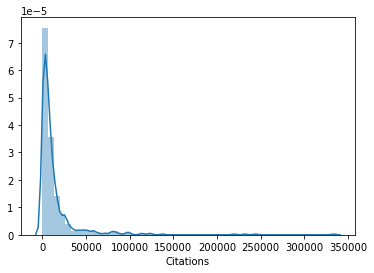

In [15]:
sns.distplot(ImpactFactor1.Citations)

In [16]:
scipy.stats.bartlett(ImpactFactor1['Citations'], ImpactFactor1['Group'])

BartlettResult(statistic=23367.873956494397, pvalue=0.0)

In [17]:
ImpactFactor1.dropna(inplace=True)

In [18]:
stats.f_oneway(ImpactFactor1['Citations'][ImpactFactor1['Group']==0], 
              ImpactFactor1['Citations'][ImpactFactor1['Group']==1],
              ImpactFactor1['Citations'][ImpactFactor1['Group']==2],
              ImpactFactor1['Citations'][ImpactFactor1['Group']==3])

F_onewayResult(statistic=1.6345321119995455, pvalue=0.18023390165215977)

# Scenario 4 Males and females who own or don't own boots

In [20]:
count = np.array([58, 20])
nobs = np.array([92, 77])
stat, pval = proportions_ztest(count, nobs)
print(stat, pval)

4.814273957654004 1.4773602105768518e-06
